# **0 Preparation**

**Importing necessary libraries**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [2]:
aps_df_new= pd.DataFrame(pd.read_csv('C:/Users/aakru/Downloads/PFAI4a/aps_failure_training_set.csv',skiprows=[i for i in range(20)]))

In [3]:
aps_df_new.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
aps_df_new.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [5]:
aps_df_new['aa_000'].size

60000

Separating the other attributes from the class attribute for later training and testing on this data

In [6]:
X=pd.DataFrame(aps_df_new.drop('class',axis=1)) 
y=pd.DataFrame(aps_df_new['class'])

In [7]:
X.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,na,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,na,0,na,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,na,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,0,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,60874,na,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


**Replace missing values by median**

In [8]:
X=X.replace('na',np.nan)
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X_imputed=pd.DataFrame(imputer.fit_transform(X),columns=X.columns)
X_imputed=X_imputed.astype(float)

In [9]:
X_imputed.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,60000.000000,6.000000e+04,6.000000e+04,60000.000000,60000.000000,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.000000,60000.000000
mean,5.933650e+04,0.162500,3.362258e+08,1.434383e+05,6.535000,10.548200,2.191577e+02,9.648104e+02,8.509771e+03,8.760054e+04,...,4.431223e+05,2.100188e+05,4.432268e+05,3.916653e+05,3.303672e+05,3.428586e+05,1.372212e+05,8.295099e+03,0.086467,0.203100
std,1.454301e+05,1.687318,7.767625e+08,3.504525e+07,158.147893,205.387115,2.036364e+04,3.400891e+04,1.494818e+05,7.575171e+05,...,1.149276e+06,5.403725e+05,1.162002e+06,1.114964e+06,1.063465e+06,1.718666e+06,4.472145e+05,4.721249e+04,4.268570,8.628043
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,2.000000e+01,4.200000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,3.033500e+03,1.204000e+03,2.848500e+03,3.839000e+03,5.600000e+02,1.180000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,8.480000e+02,2.920000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.350315e+05,2.164440e+05,4.624655e+05,4.003010e+05,2.725220e+05,1.663465e+05,1.367255e+05,1.934000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [10]:
X_imputed.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698.0,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,33058.0,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,41040.0,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,60874.0,0.0,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [11]:
y.head()
y.value_counts()

class
neg      59000
pos       1000
dtype: int64

**Converting "neg" "pos" to 0 and 1** 

In [12]:
y_num=pd.DataFrame(pd.get_dummies(y).drop(['class_neg'],axis=1).squeeze())
y_num=y_num.rename(columns={'class_pos':'class'})

In [13]:
y_num.head()

,class
0,0
1,0
2,0
3,0
4,0


# **1 Standardize the data of X**

In [14]:
sc = StandardScaler()
X_imputed_sc= pd.DataFrame(sc.fit_transform(X_imputed),columns=X.columns)

In [15]:
X_imputed_sc.head()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.119381,-0.096307,2.310224,-0.004085,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,...,0.693832,0.524393,0.239087,0.070072,0.008264,-0.107586,-0.143103,-0.175699,-0.020257,-0.023540
1,-0.180697,-0.096307,-0.432859,-0.004089,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,...,-0.018901,-0.059135,-0.129021,-0.131171,-0.184975,-0.152281,-0.088650,-0.143927,-0.020257,-0.023540
2,-0.125811,-0.096307,-0.432859,-0.004090,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,...,-0.144217,-0.092912,-0.016553,0.016053,-0.009047,-0.107547,-0.094124,-0.164812,-0.020257,-0.023540
3,-0.407928,-0.096307,-0.432859,-0.004091,-0.041322,-0.002669,-0.010762,-0.02837,-0.056929,-0.115223,...,-0.385361,-0.388574,-0.381387,-0.351244,-0.310645,-0.199493,-0.306838,-0.175699,0.916833,3.685328
4,0.010572,-0.096307,-0.432857,-0.004080,-0.041322,-0.051358,-0.010762,-0.02837,-0.056929,-0.115643,...,0.155656,0.036588,-0.032641,-0.039892,-0.040823,-0.018211,0.663519,-0.149900,-0.020257,-0.023540


**Checking the balance in dataframe**

In [16]:
y_num.value_counts()

class
0        59000
1         1000
dtype: int64

This shows that our training data has a **huge imbalance**

# **Random Forest**

Since we have a lot of attributes i.e. high dimensionality, we can take advantage of that using random forest classifier 

In [17]:
rf = RandomForestClassifier()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed_sc, y_num,stratify=y,test_size=0.25)

C:\Users\aakru\AppData\Local\Temp/ipykernel_108/3348579493.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\aakru\AppData\Local\Temp/ipykernel_108/3348579493.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\aakru\AppData\Local\Temp/ipykernel_108/3348579493.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\aakru\AppData\Local\Temp/ipykernel_108/3348579493.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)
C:\Users\aak

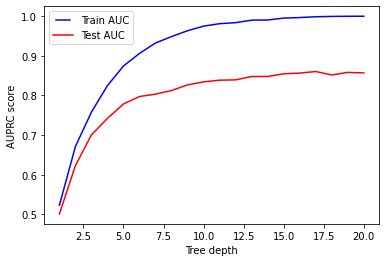

In [19]:
max_depths = np.linspace(1, 20, 20, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_imputed_sc)
   roc_auc = metrics.average_precision_score(y_train, rf.predict_proba(X_train)[:, 1])
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   roc_auc = metrics.average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUPRC score')
plt.xlabel('Tree depth')
plt.show()

In [20]:
rf = RandomForestClassifier(max_depth=5)
rf.fit(X_train, y_train)

C:\Users\aakru\AppData\Local\Temp/ipykernel_108/4290863570.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=5)

In [21]:
roc_auc = metrics.average_precision_score(y_train, rf.predict_proba(X_train)[:, 1])
roc_auc

0.8741602865907674

In [22]:
roc_aucn = metrics.average_precision_score(y_num, rf.predict_proba(X_imputed_sc)[:, 1])
roc_aucn

0.850516942868963

In [23]:
roc_auc1 = metrics.average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc1

0.7787645280977125

**Confusion matrix and score for training**

In [24]:
mat1=metrics.confusion_matrix(y_num, rf.predict(X_imputed_sc))
val1= 10*(mat1[0][1]) + 50*(mat1[1][0])
val1

22510

# **Test data check**

In [25]:
test_data= pd.DataFrame(pd.read_csv('../Downloads/PFAI4a/aps_failure_test_set.csv',skiprows=[i for i in range(20)]))

In [26]:
test_X=pd.DataFrame(test_data.drop('class',axis=1)) 
test_y=pd.DataFrame(test_data['class'])

In [27]:
testX=test_X.replace('na',np.nan)
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
testX_n=pd.DataFrame(imputer.fit_transform(testX),columns=testX.columns)
testX_n=testX_n.astype(float)

y_numtest=pd.DataFrame(pd.get_dummies(test_y).drop(['class_neg'],axis=1).squeeze())
y_numtest=y_numtest.rename(columns={'class_pos':'class'})

In [28]:
sc = StandardScaler()
X_testi= pd.DataFrame(sc.fit_transform(testX_n),columns=testX_n.columns)

C:\Users\aakru\AppData\Local\Temp/ipykernel_108/1993864355.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train)
C:\Users\aakru\AppData\Local\Temp/ipykernel_108/1993864355.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train)
C:\Users\aakru\AppData\Local\Temp/ipykernel_108/1993864355.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train)
C:\Users\aakru\AppData\Local\Temp/ipykernel_108/1993864355.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train)
C:\Users

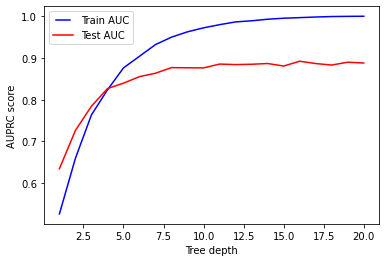

In [29]:
max_depths = np.linspace(1, 20, 20, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf1 = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf1.fit(X_train, y_train)
   train_pred = rf1.predict(X_imputed_sc)
   #false_positive_rate, true_positive_rate, thresholds = precision_recall_curve(y_train, rf.predict_proba(X_train)[:, 1])
   roc_auc = metrics.average_precision_score(y_train, rf1.predict_proba(X_train)[:, 1])
   train_results.append(roc_auc)
   y_pred = rf1.predict(X_testi)
   #false_positive_rate, true_positive_rate, thresholds = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
   roc_auc = metrics.average_precision_score(y_numtest, rf1.predict_proba(X_testi)[:, 1])
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUPRC score')
plt.xlabel('Tree depth')
plt.show()

In [30]:
rf1 = RandomForestClassifier(max_depth=5)
rf1.fit(X_imputed_sc, y_num)
roc_auc = metrics.average_precision_score(y_numtest, rf1.predict_proba(X_testi)[:, 1])
roc_auc

C:\Users\aakru\AppData\Local\Temp/ipykernel_108/2099350017.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_imputed_sc, y_num)


0.8428400476384974

**Confusion matrix and score for test data**

In [31]:
mat=metrics.confusion_matrix(y_numtest, rf1.predict(X_testi))
val= 10*(mat[0][1]) + 50*(mat[1][0])
val

10870

# **-------------**

# **PCA**

In [32]:
pca = PCA(n_components=2)
X_pca=pd.DataFrame(pca.fit_transform(X_imputed_sc))
X_newtest=pd.DataFrame(pca.fit_transform(X_testi))
explained_variance_ratio =  pca.explained_variance_ratio_ #change this
df_principal_components = pd.DataFrame(pca.components_ , columns=X_imputed_sc.columns) #change this

In [33]:
df_principal_components

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.044827,0.006073,-0.008675,0.026176,0.005451,0.006125,0.042062,0.048447,0.065535,0.088334,...,0.129877,0.123847,0.117385,0.113988,0.106829,0.081371,0.059913,0.031384,-0.000013,-0.000040
1,0.007251,0.003615,-0.013701,-0.073598,-0.005880,-0.005903,0.219232,0.241884,0.232216,0.225925,...,0.009762,-0.005944,-0.001471,0.073780,0.068351,0.047766,-0.091932,-0.071065,-0.000324,-0.000888


In [34]:
Xtr, Xts, ytr, yts = train_test_split(X_pca, y_num,stratify=y,test_size=0.25)

# **KNN Classifier**

C:\Users\aakru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aakru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aakru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aakru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\aakru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aakru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aakru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aakru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

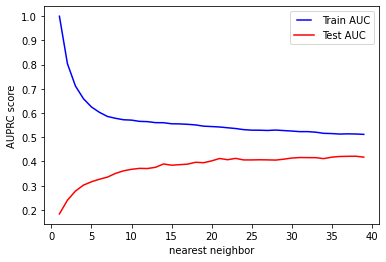

In [35]:
knn = KNeighborsClassifier()
k_range = list(range(1, 40))
train_results = []
test_results = []
for k in k_range:
   knn = KNeighborsClassifier(n_neighbors=k)
   knn.fit(Xtr, ytr)
   #false_positive_rate, true_positive_rate, thresholds = precision_recall_curve(y_train, rf.predict_proba(X_train)[:, 1])
   roc_auc = metrics.average_precision_score(ytr, knn.predict_proba(Xtr)[:, 1])
   train_results.append(roc_auc)
   roc_auc = metrics.average_precision_score(yts, knn.predict_proba(Xts)[:, 1])
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(k_range, train_results, 'b', label='Train AUC')
line2, = plt.plot(k_range, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUPRC score')
plt.xlabel('nearest neighbor')
plt.show()

**cross validation score using training data**

In [36]:
knn1 = KNeighborsClassifier(n_neighbors=15)
#knn1.fit(X_pca, y_num)
score= cross_val_score(knn1, X_pca, y_num,scoring="average_precision", cv=5).mean()
score


C:\Users\aakru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aakru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aakru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\aakru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

0.42978642088396857

In [37]:
knn1 = KNeighborsClassifier(n_neighbors=15)
knn1.fit(X_pca,y_num)
#knn1.fit(X_pca, y_num)
score= metrics.average_precision_score(y_numtest,knn1.predict(X_newtest))
score


C:\Users\aakru\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.12109383608815427

**Confusion matrix and score for training and test on knn**

In [38]:
mat1=metrics.confusion_matrix(y_num, knn1.predict(X_pca))
val1= 10*(mat1[0][1]) + 50*(mat1[1][0])
val1

34860

In [39]:
mat=metrics.confusion_matrix(y_numtest, knn1.predict(X_newtest))
val= 10*(mat[0][1]) + 50*(mat[1][0])
val

15880

# **SVM Classifier**

C:\Users\aakru\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aakru\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\aakru\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


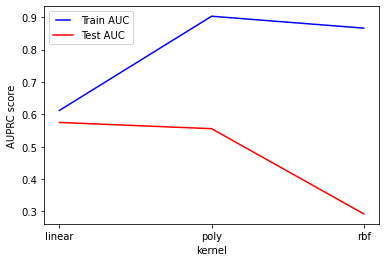

In [40]:
svc=SVC()
kern = ['linear', 'poly', 'rbf']
train_results = []
test_results = []
for k in kern:
   svc=SVC(kernel=k)
   svc.fit(X_train, y_train)
   roc_auc = metrics.average_precision_score(y_train, svc.predict(X_train))
   train_results.append(roc_auc)
   roc_auc = metrics.average_precision_score(y_test, svc.predict(X_test))
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(kern, train_results, 'b', label='Train AUC')
line2, = plt.plot(kern, test_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUPRC score')
plt.xlabel('kernel')
plt.show()

In [41]:
clf =SVC(kernel='poly', C=1)
clf.fit(X_imputed_sc, y_num)
roc_auc = metrics.average_precision_score(y_numtest, clf.predict(X_testi))
roc_auc

C:\Users\aakru\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5425087515489467

In [42]:
clf.fit(X_imputed_sc, y_num)
roc_auc = metrics.average_precision_score(y_num, clf.predict(X_imputed_sc))
roc_auc

C:\Users\aakru\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8957666666666667

In [43]:
mat2=metrics.confusion_matrix(y_num, clf.predict(X_imputed_sc))
val_svm= 10*(mat2[0][1]) + 50*(mat2[1][0])
val_svm

5300

In [44]:
clf.fit(X_imputed_sc, y_num)
mat3=metrics.confusion_matrix(y_numtest, clf.predict(X_testi))
val_svm= 10*(mat3[0][1]) + 50*(mat3[1][0])
val_svm

C:\Users\aakru\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


7520

In [45]:
mat3

array([[15588,    37],
       [  143,   232]], dtype=int64)